In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, multilabel_confusion_matrix

In [111]:
df = pd.read_csv('winequality-white.csv')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

First let's check presence of any null values in our dataset.

In [112]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

We don't have any null values!

In [113]:
df.describe().T

count        mean        std      min         25%  \
fixed acidity         4898.0    6.854788   0.843868  3.80000    6.300000   
volatile acidity      4898.0    0.278241   0.100795  0.08000    0.210000   
citric acid           4898.0    0.334192   0.121020  0.00000    0.270000   
residual sugar        4898.0    6.391415   5.072058  0.60000    1.700000   
chlorides             4898.0    0.045772   0.021848  0.00900    0.036000   
free sulfur dioxide   4898.0   35.308085  17.007137  2.00000   23.000000   
total sulfur dioxide  4898.0  138.360657  42.498065  9.00000  108.000000   
density               4898.0    0.994027   0.002991  0.98711    0.991723   
pH                    4898.0    3.188267   0.151001  2.72000    3.090000   
sulphates             4898.0    0.489847   0.114126  0.22000    0.410000   
alcohol               4898.0   10.514267   1.230621  8.00000    9.500000   
quality               4898.0    5.877909   0.885639  3.00000    5.000000   

                            50%       75%        max  
fixed acidity           6.80000    7.3000   14.20000  
volatile acidity        0.26000    0.3200    1.10000  
citric acid             0.32000    0.3900    1.66000  
residual sugar          5.20000    9.9000   65.80000  
chlorides               0.04300    0.0500    0.34600  
free sulfur dioxide    34.00000   46.0000  289.00000  
total sulfur dioxide  134.00000  167.0000  440.00000  
density                 0.99374    0.9961    1.03898  
pH                      3.18000    3.2800    3.82000  
sulphates               0.47000    0.5500    1.08000  
alcohol                10.40000   11.4000   14.20000  
quality                 6.00000    6.0000    9.00000

From our data, it looks as if we only have numerical features.

<h1>EDA

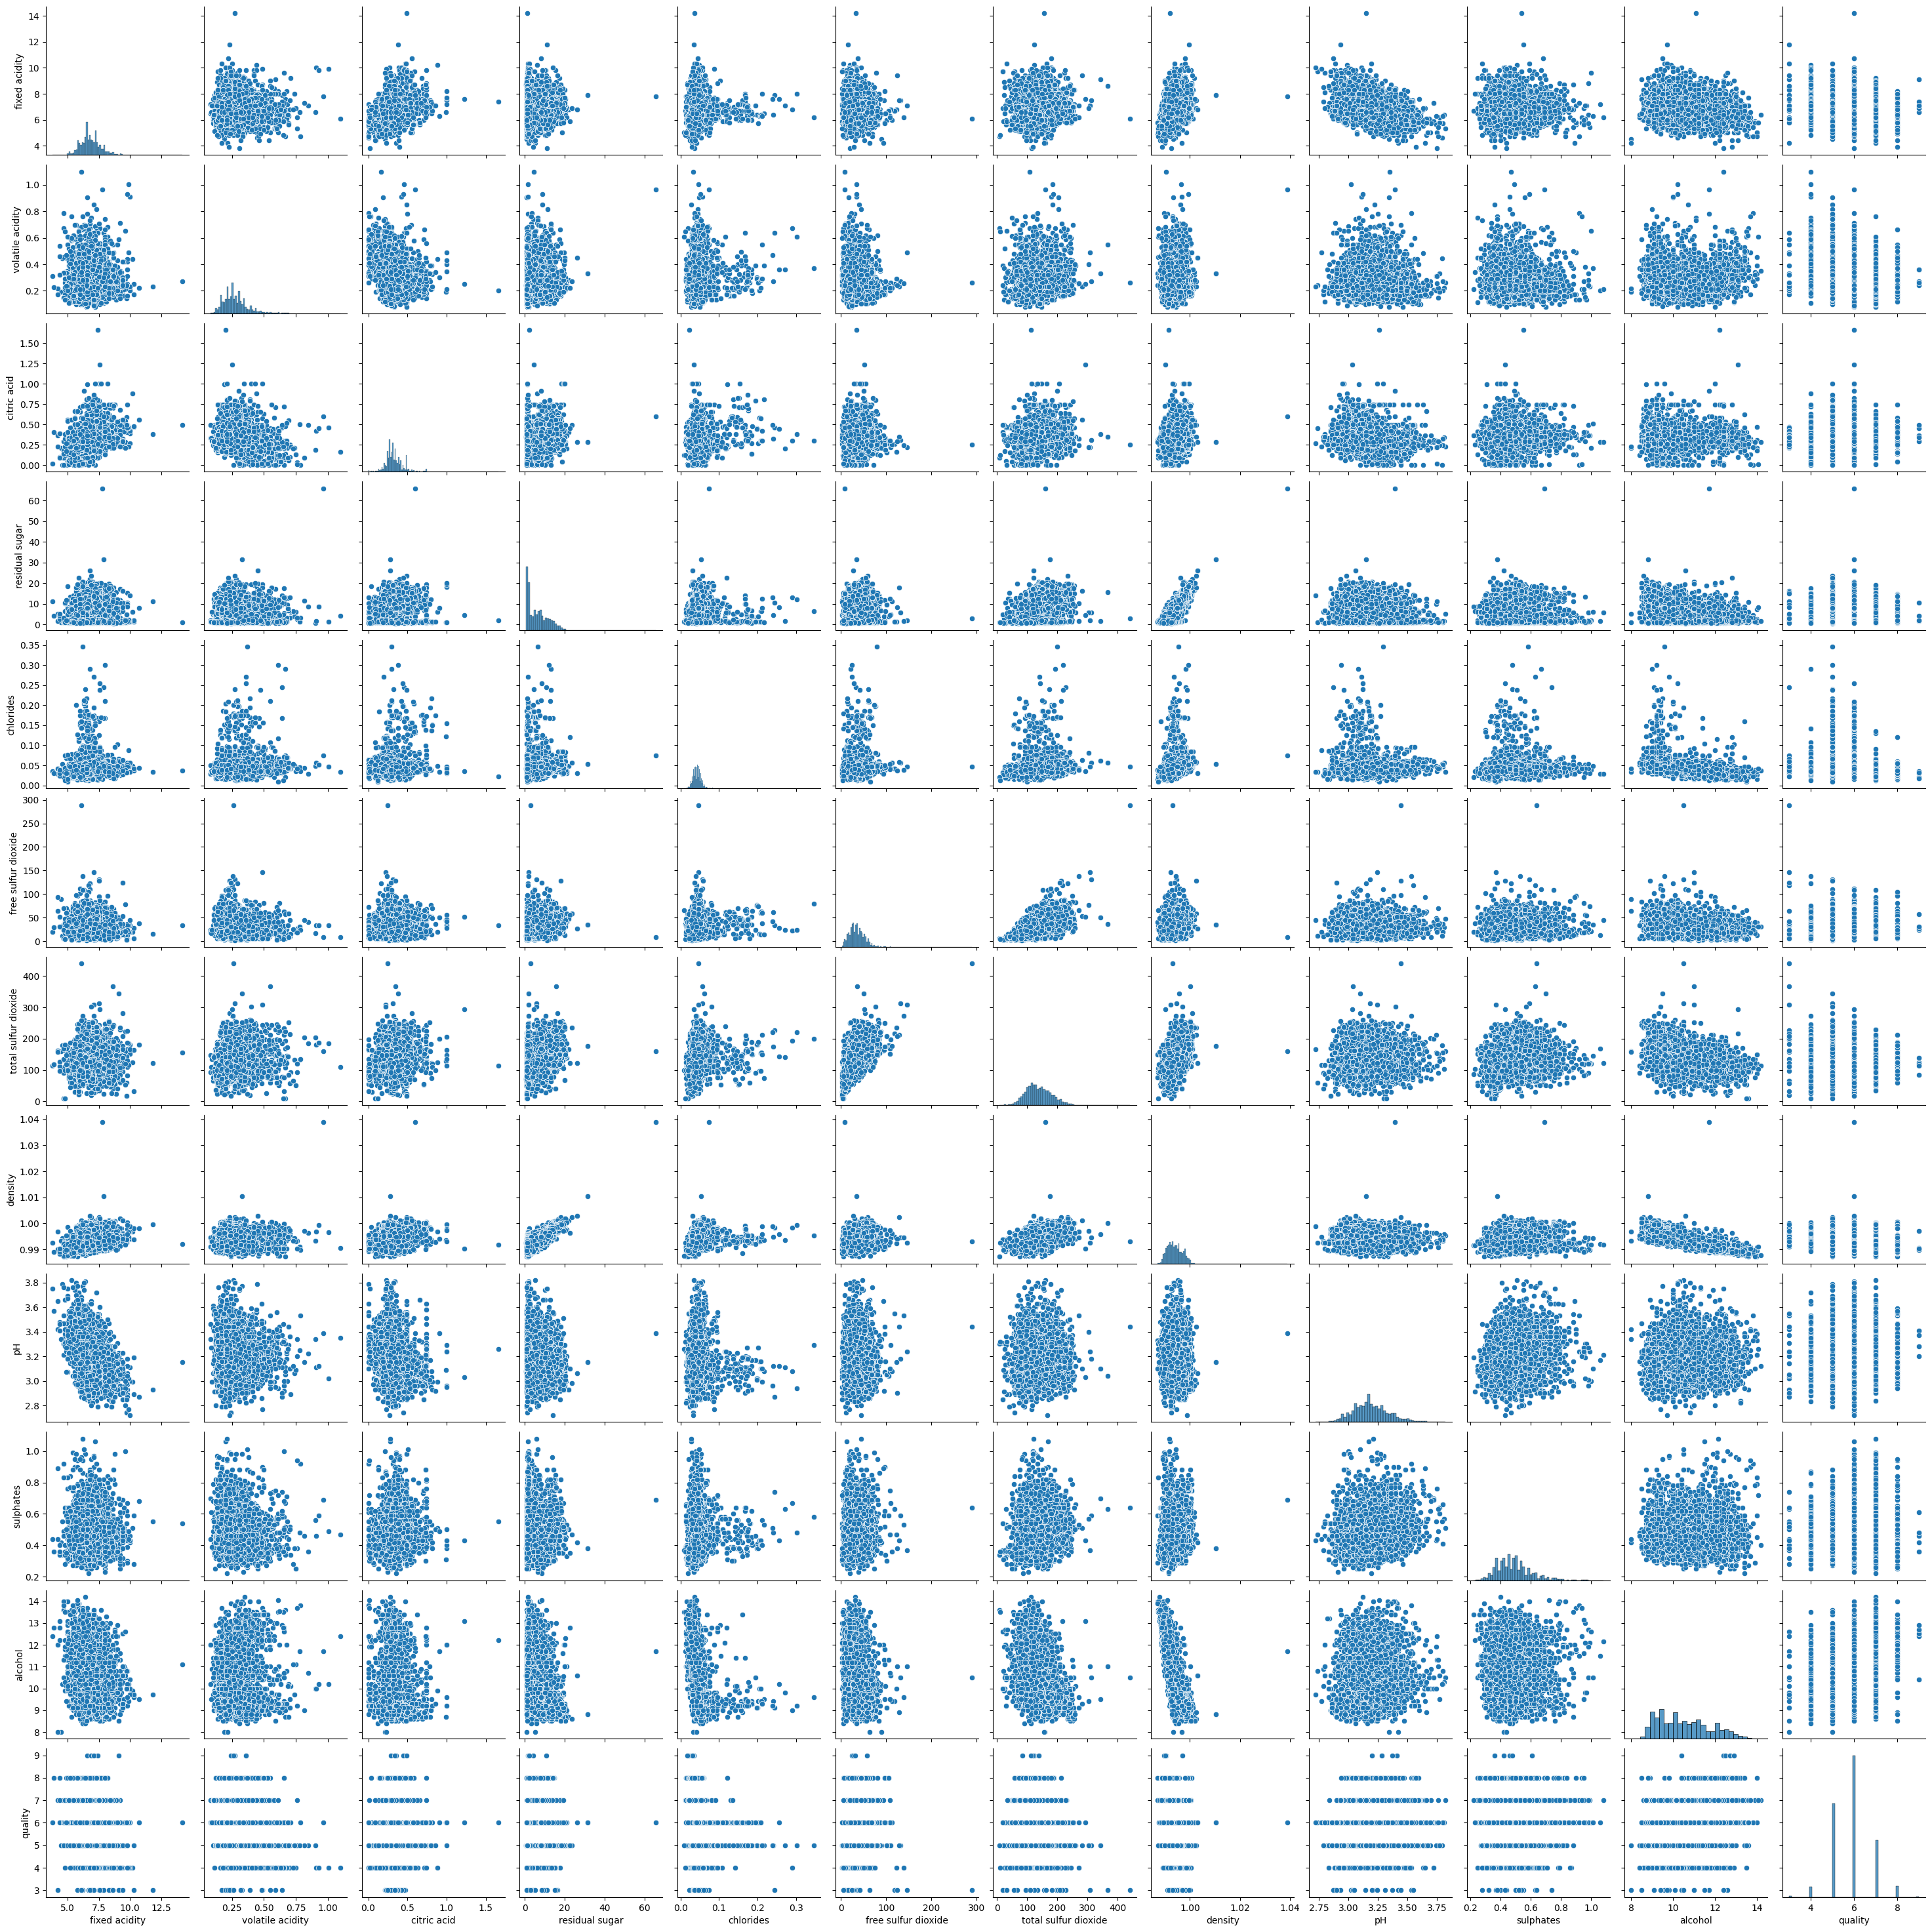

In [114]:
sns.pairplot(df)

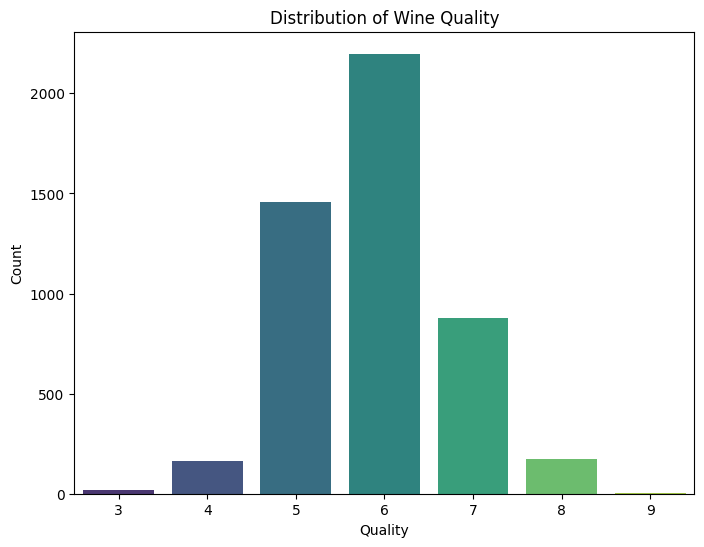

In [115]:
value_counts = df['quality'].value_counts()
# Create a bar plot
plt.figure(figsize=(8, 6))  # Set the figure size
sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")  # Create the bar plot
plt.xlabel("Quality")  # Label for the x-axis
plt.ylabel("Count")    # Label for the y-axis
plt.title("Distribution of Wine Quality")  # Title of the plot
plt.show()  

<Axes: >

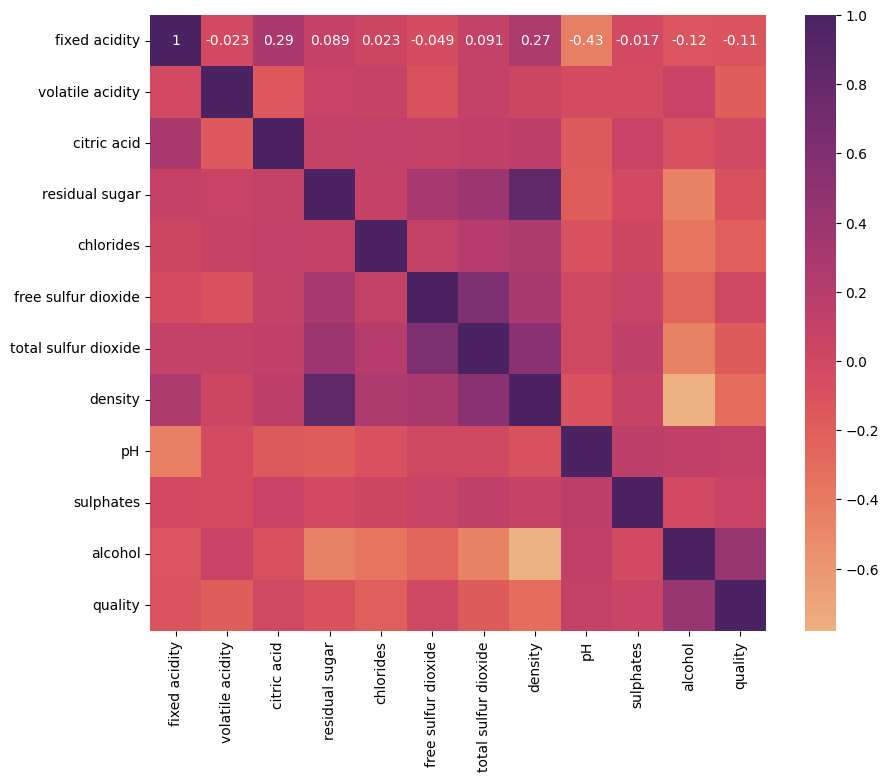

In [116]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='flare', annot=True, square=True)

Density seems to be in strong correlation with residual sugar.

Let's see the distribution of features

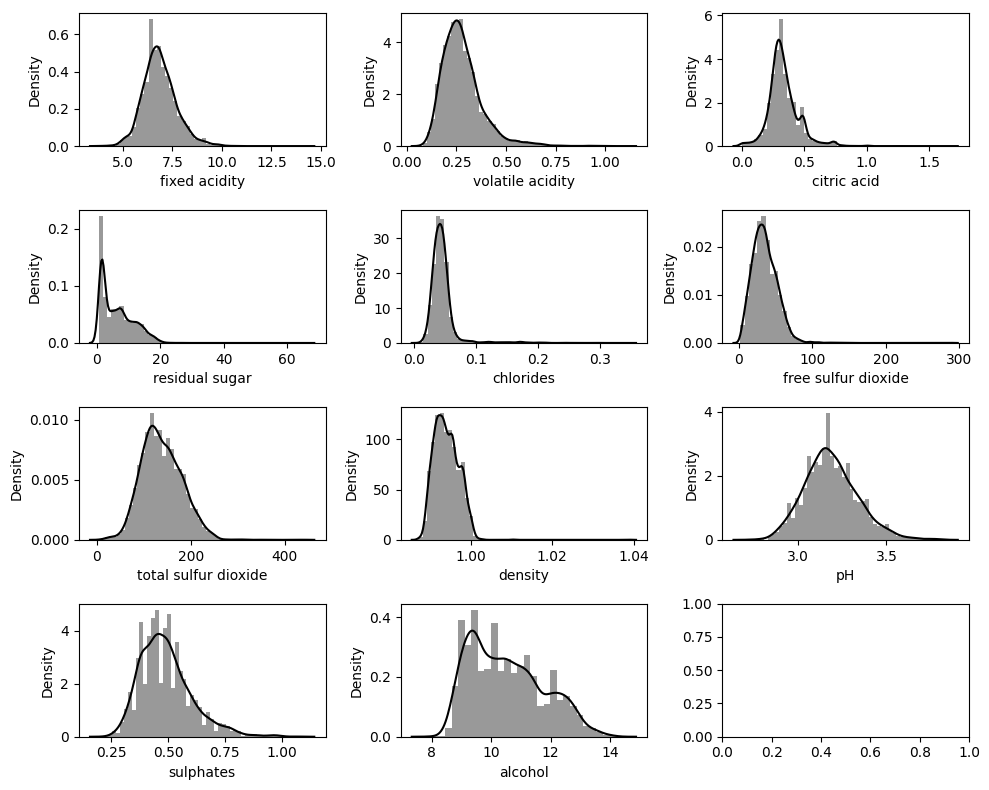

In [117]:
fig, axes = plt.subplots(4,3,figsize=(10,8))

i=0
for row in range(4):
    for col in range(3):
        if i<11:
            sns.distplot(df[df.columns[:-1][i]], ax=axes[row][col], color='black')
            i+=1

fig.tight_layout()

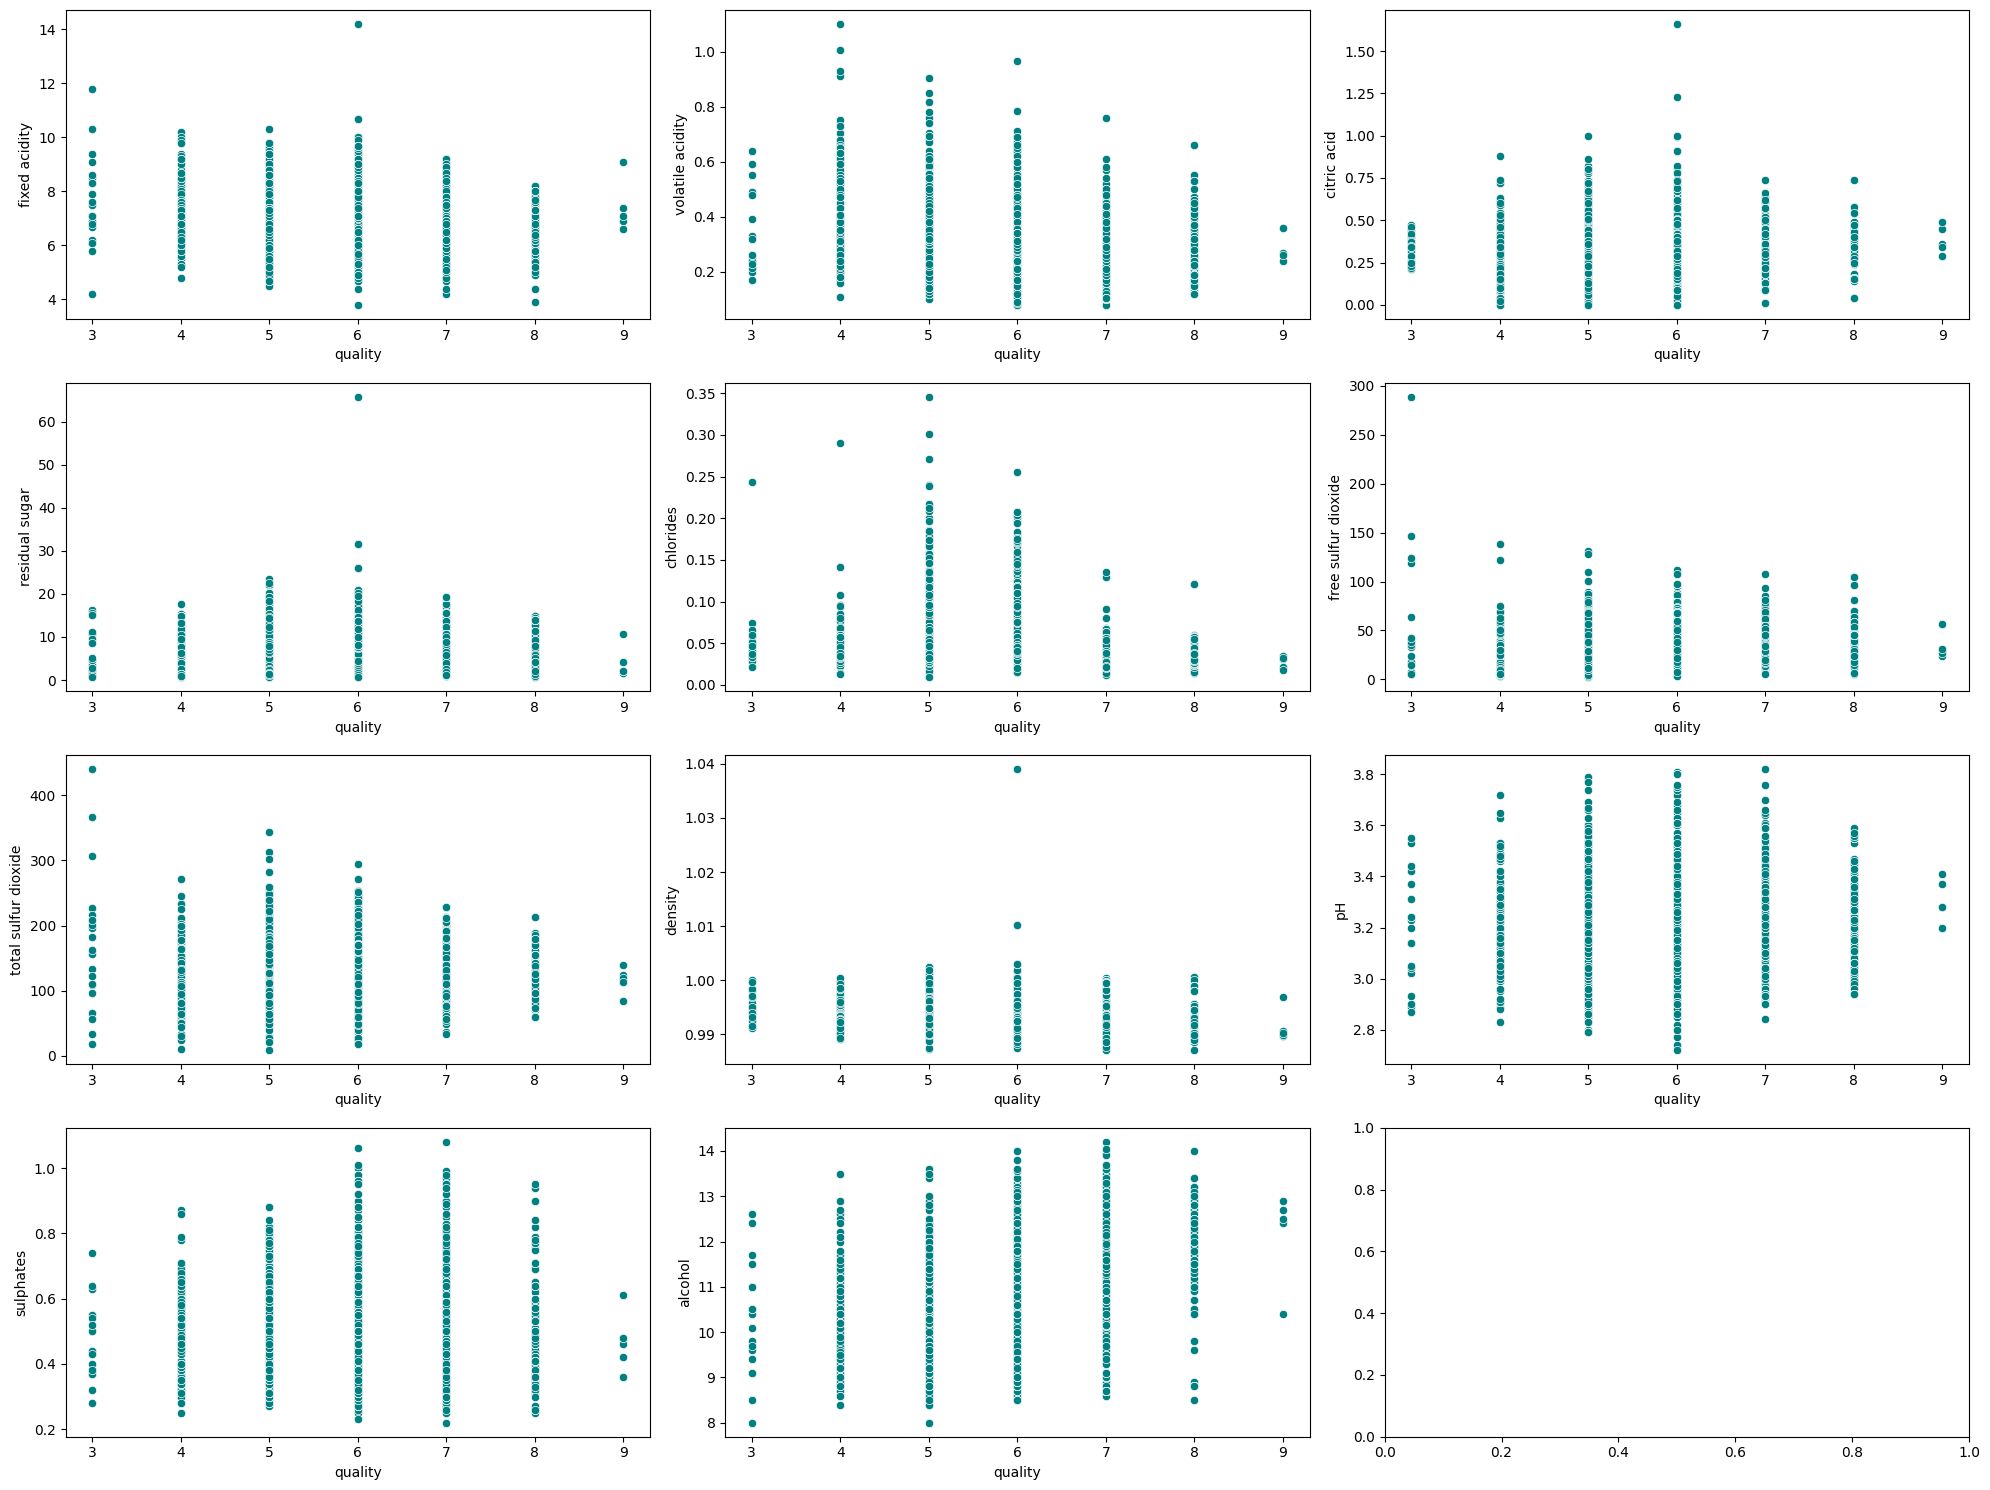

In [118]:
fig, axes = plt.subplots(4,3,figsize=(20,15))

i=0
for row in range(4):
    for col in range(3):
        if i<11:
            sns.scatterplot(x=df['quality'], y=df[df.columns[:-1][i]], ax=axes[row][col], color='teal')
            i+=1

fig.tight_layout()

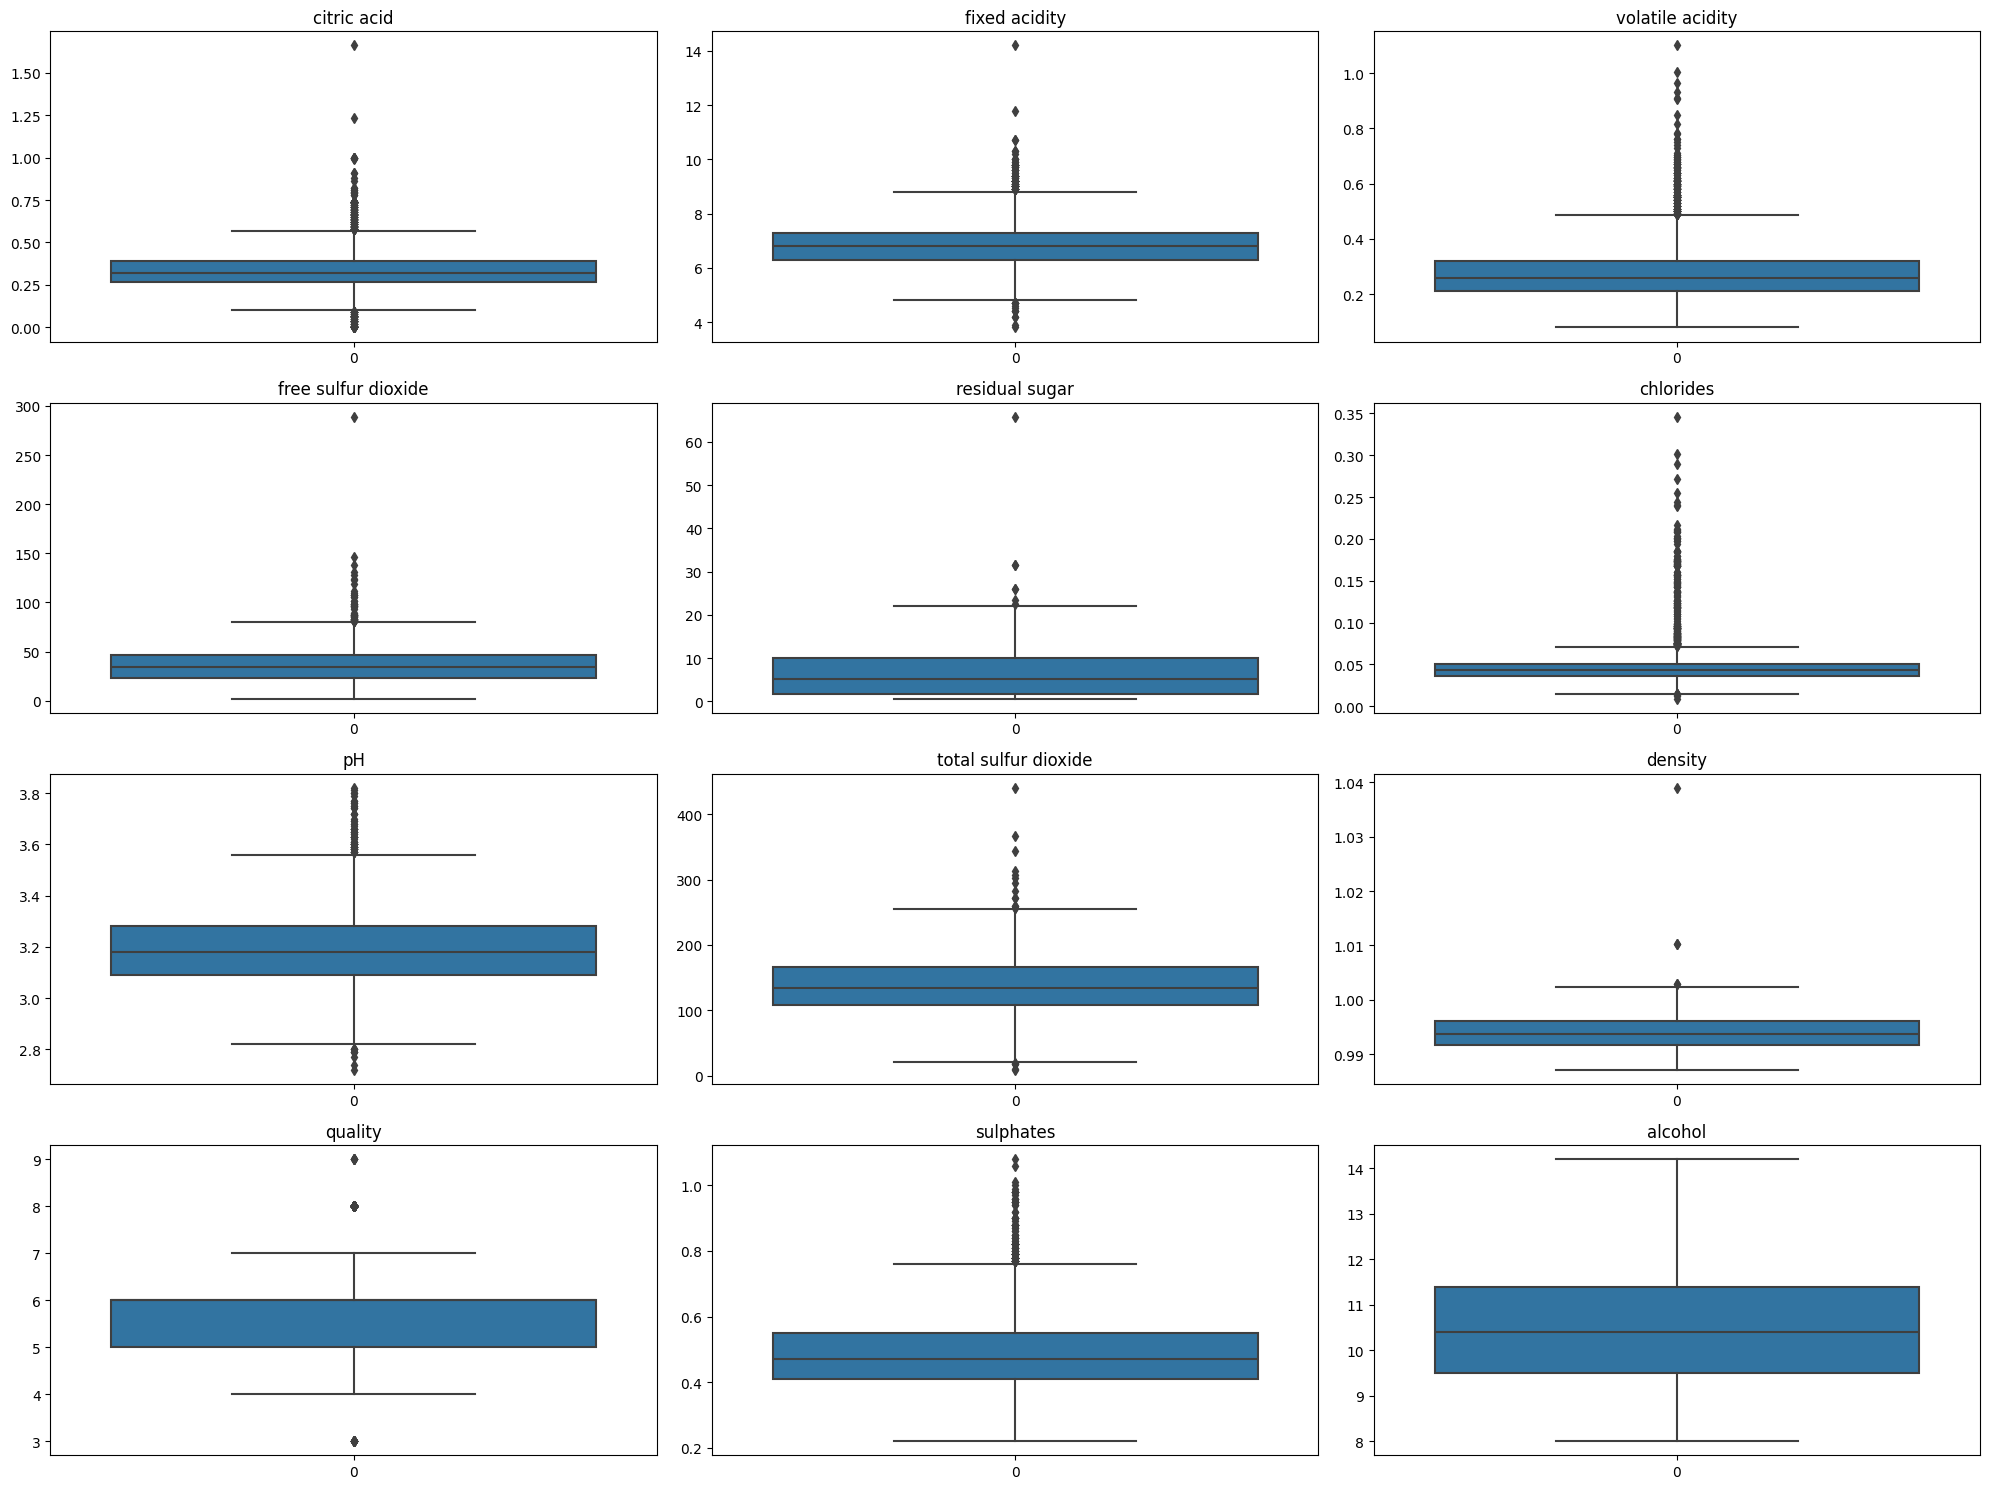

In [119]:
fig, axes = plt.subplots(4,3,figsize=(20,15))
i=0
for col in df.columns:
    i+=1
    sns.boxplot(df[col], ax=axes[(i -1) // 3][i % 3]).set(title=col)
fig.tight_layout()

# Remove Outlier

In [120]:
droped_df = df.copy()
# droped_df.drop( columns=['quality'], inplace=True)
outlier_index = np.array([])
for col in droped_df.columns:
    if (col == 'quality'):
        continue
    field = col
    Q1 = df[field].quantile(0.25)
    Q3 = df[field].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    # Create arrays of Boolean values indicating the outlier rows
    outlier_index =np.union1d(np.where(df[field]>=upper)[0],outlier_index)
    outlier_index = np.union1d(np.where(df[field]<=lower)[0],outlier_index)
    

# Removing the outliers
droped_df.drop(index=outlier_index,inplace=True)

# Print the new shape of the DataFrame
print("Old Shape: ", df.shape)
print("New Shape: ", droped_df.shape)


Old Shape:  (4898, 12)
New Shape:  (3998, 12)


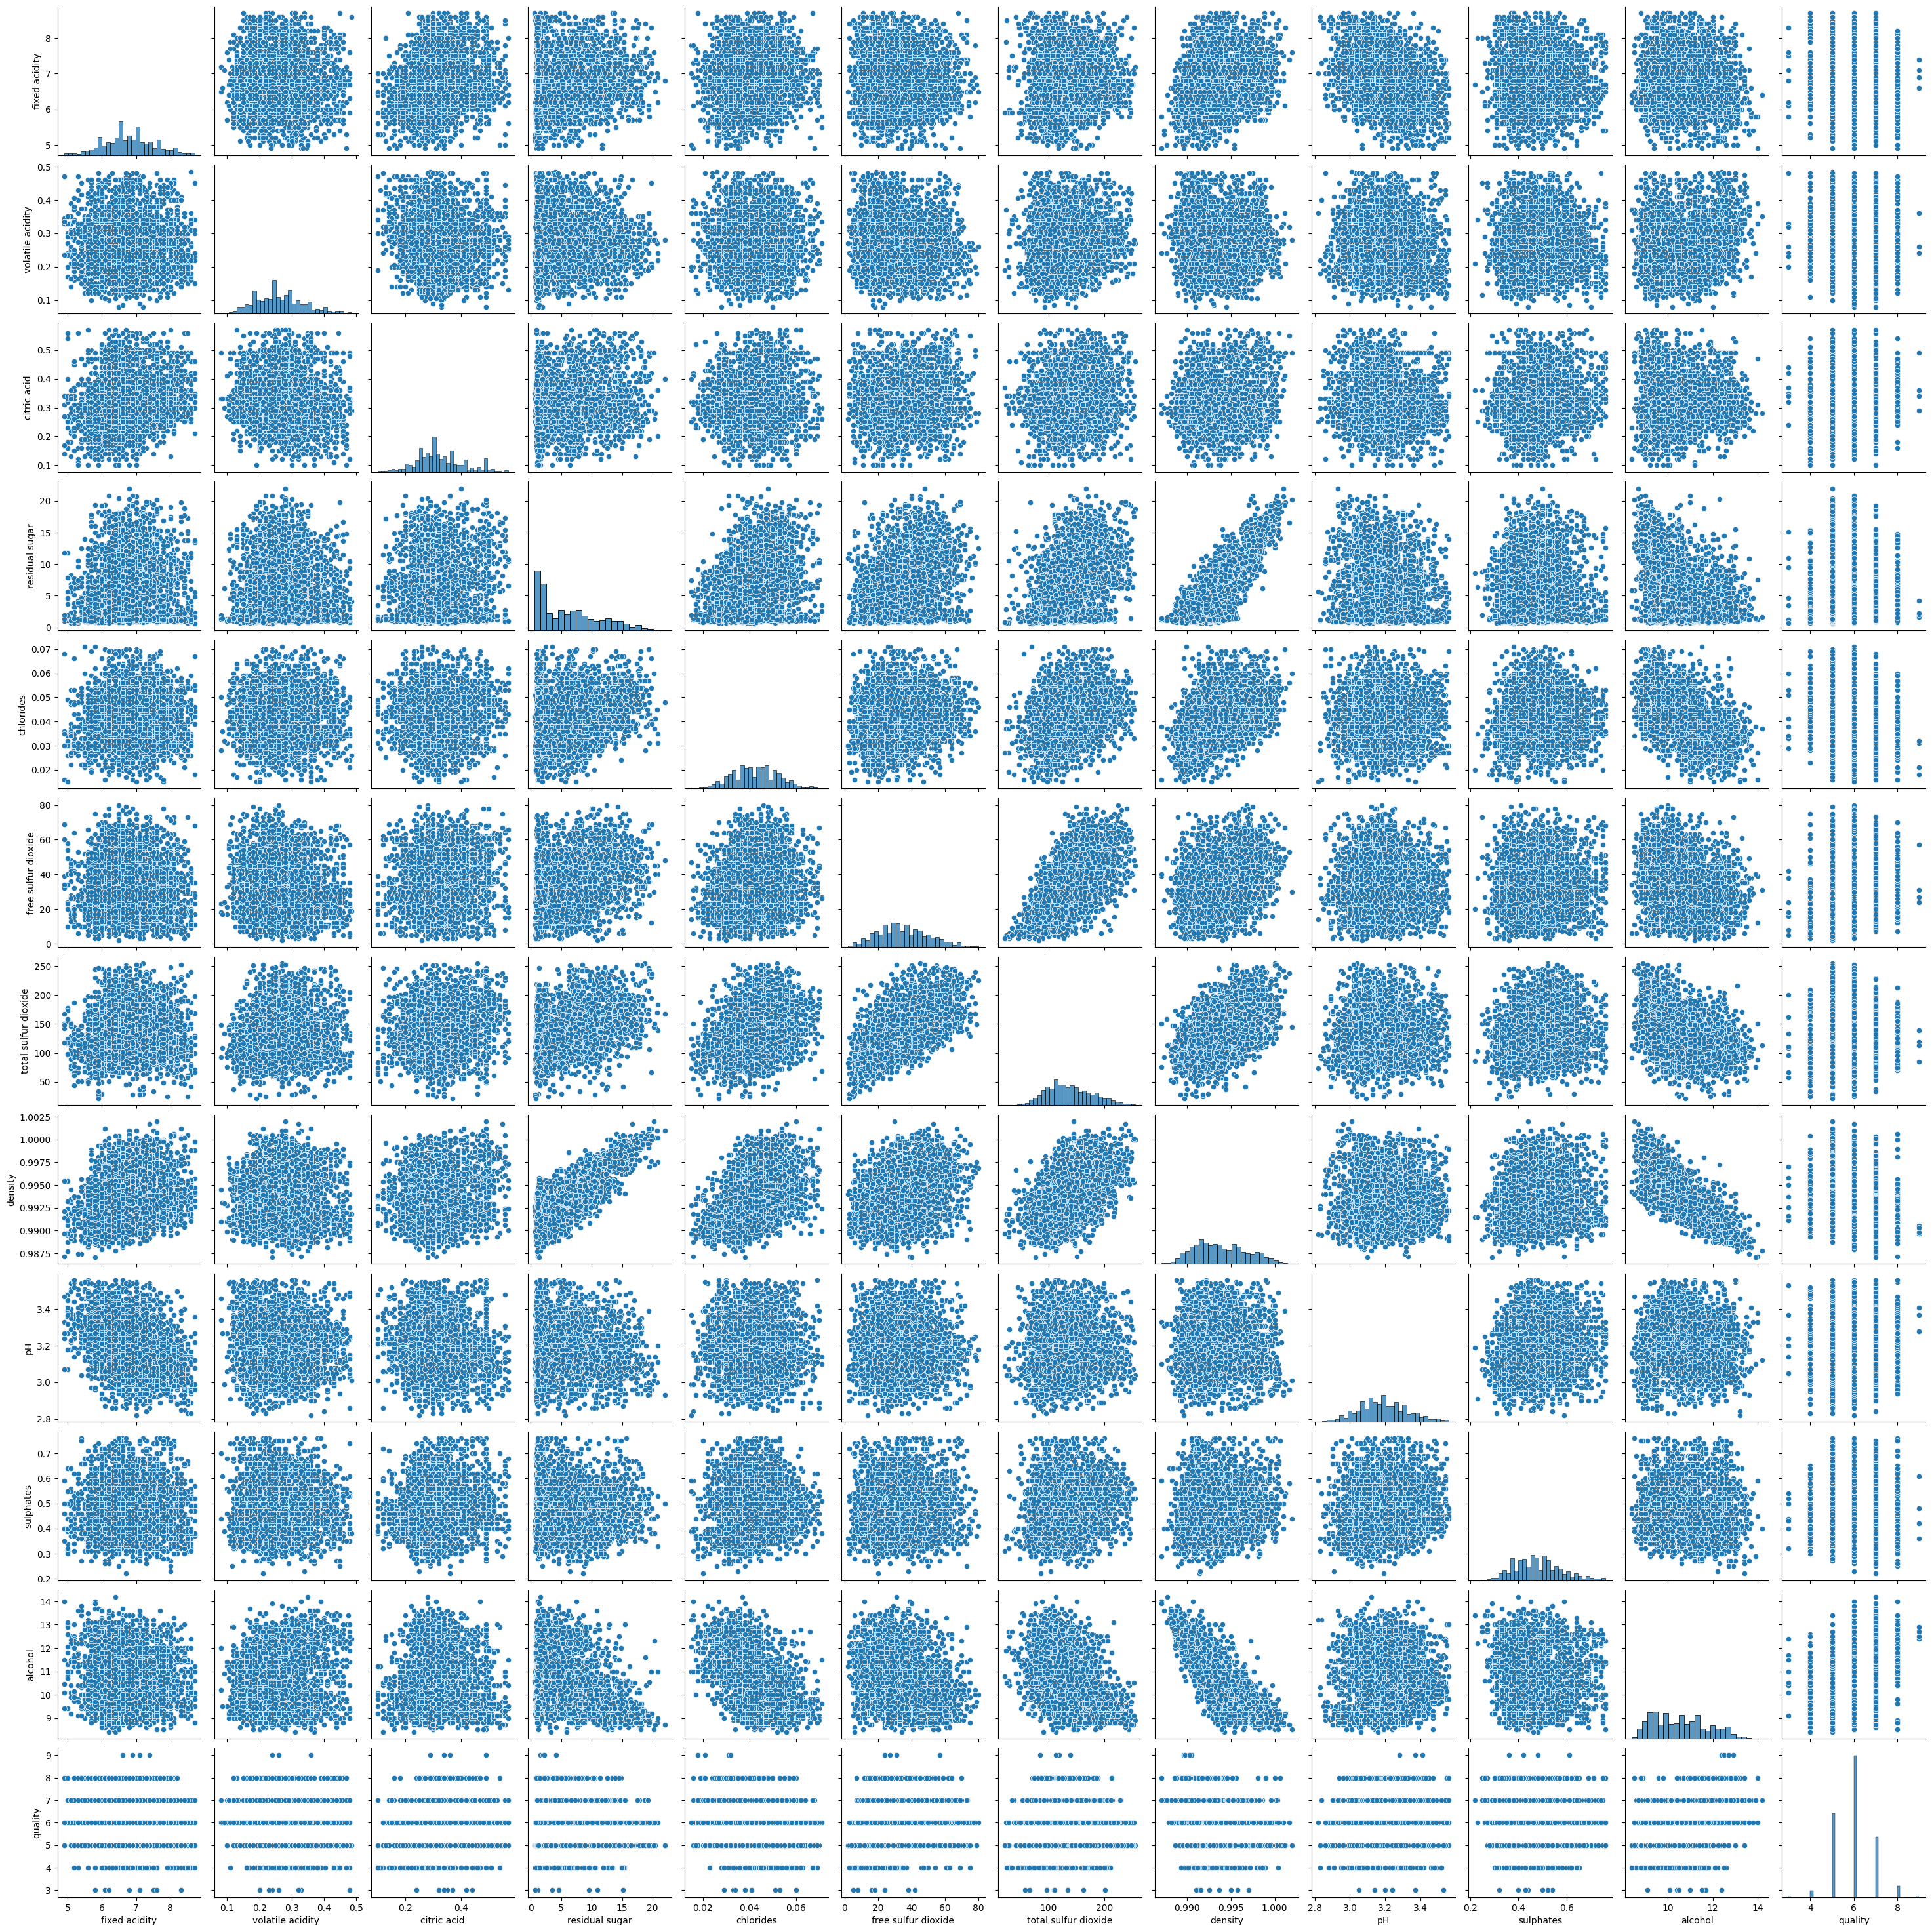

In [125]:
sns.pairplot(droped_df)

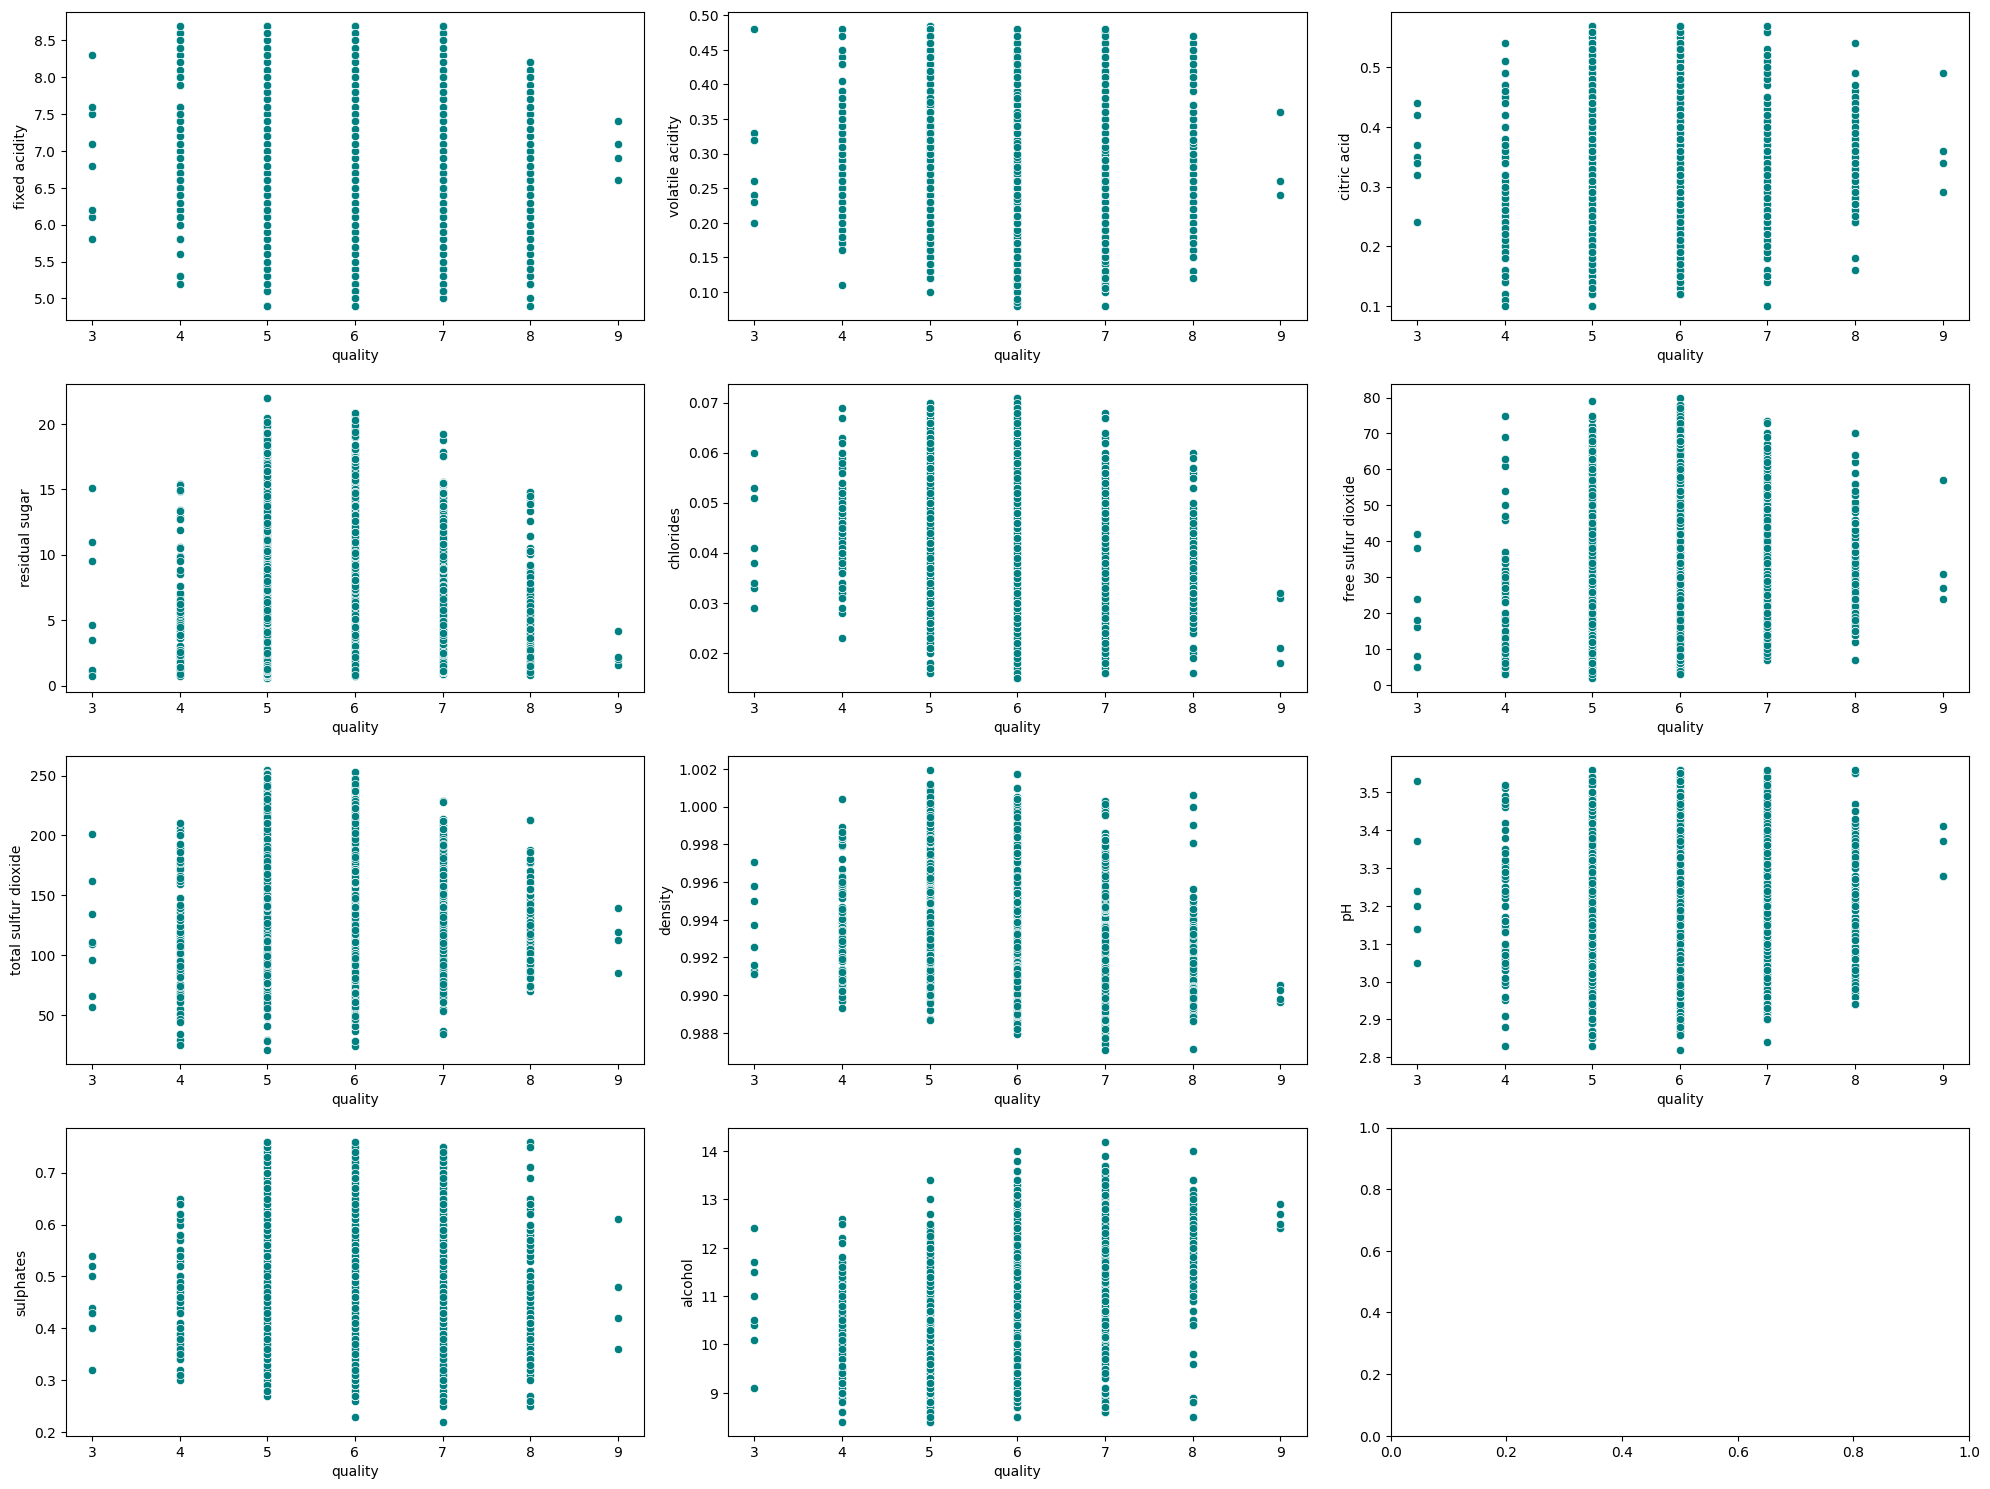

In [124]:
fig, axes = plt.subplots(4,3,figsize=(20,15))

i=0
for row in range(4):
    for col in range(3):
        if i<11:
            sns.scatterplot(x=df['quality'], y=droped_df[droped_df.columns[:-1][i]], ax=axes[row][col], color='teal')
            i+=1

fig.tight_layout()

(3998, 12)


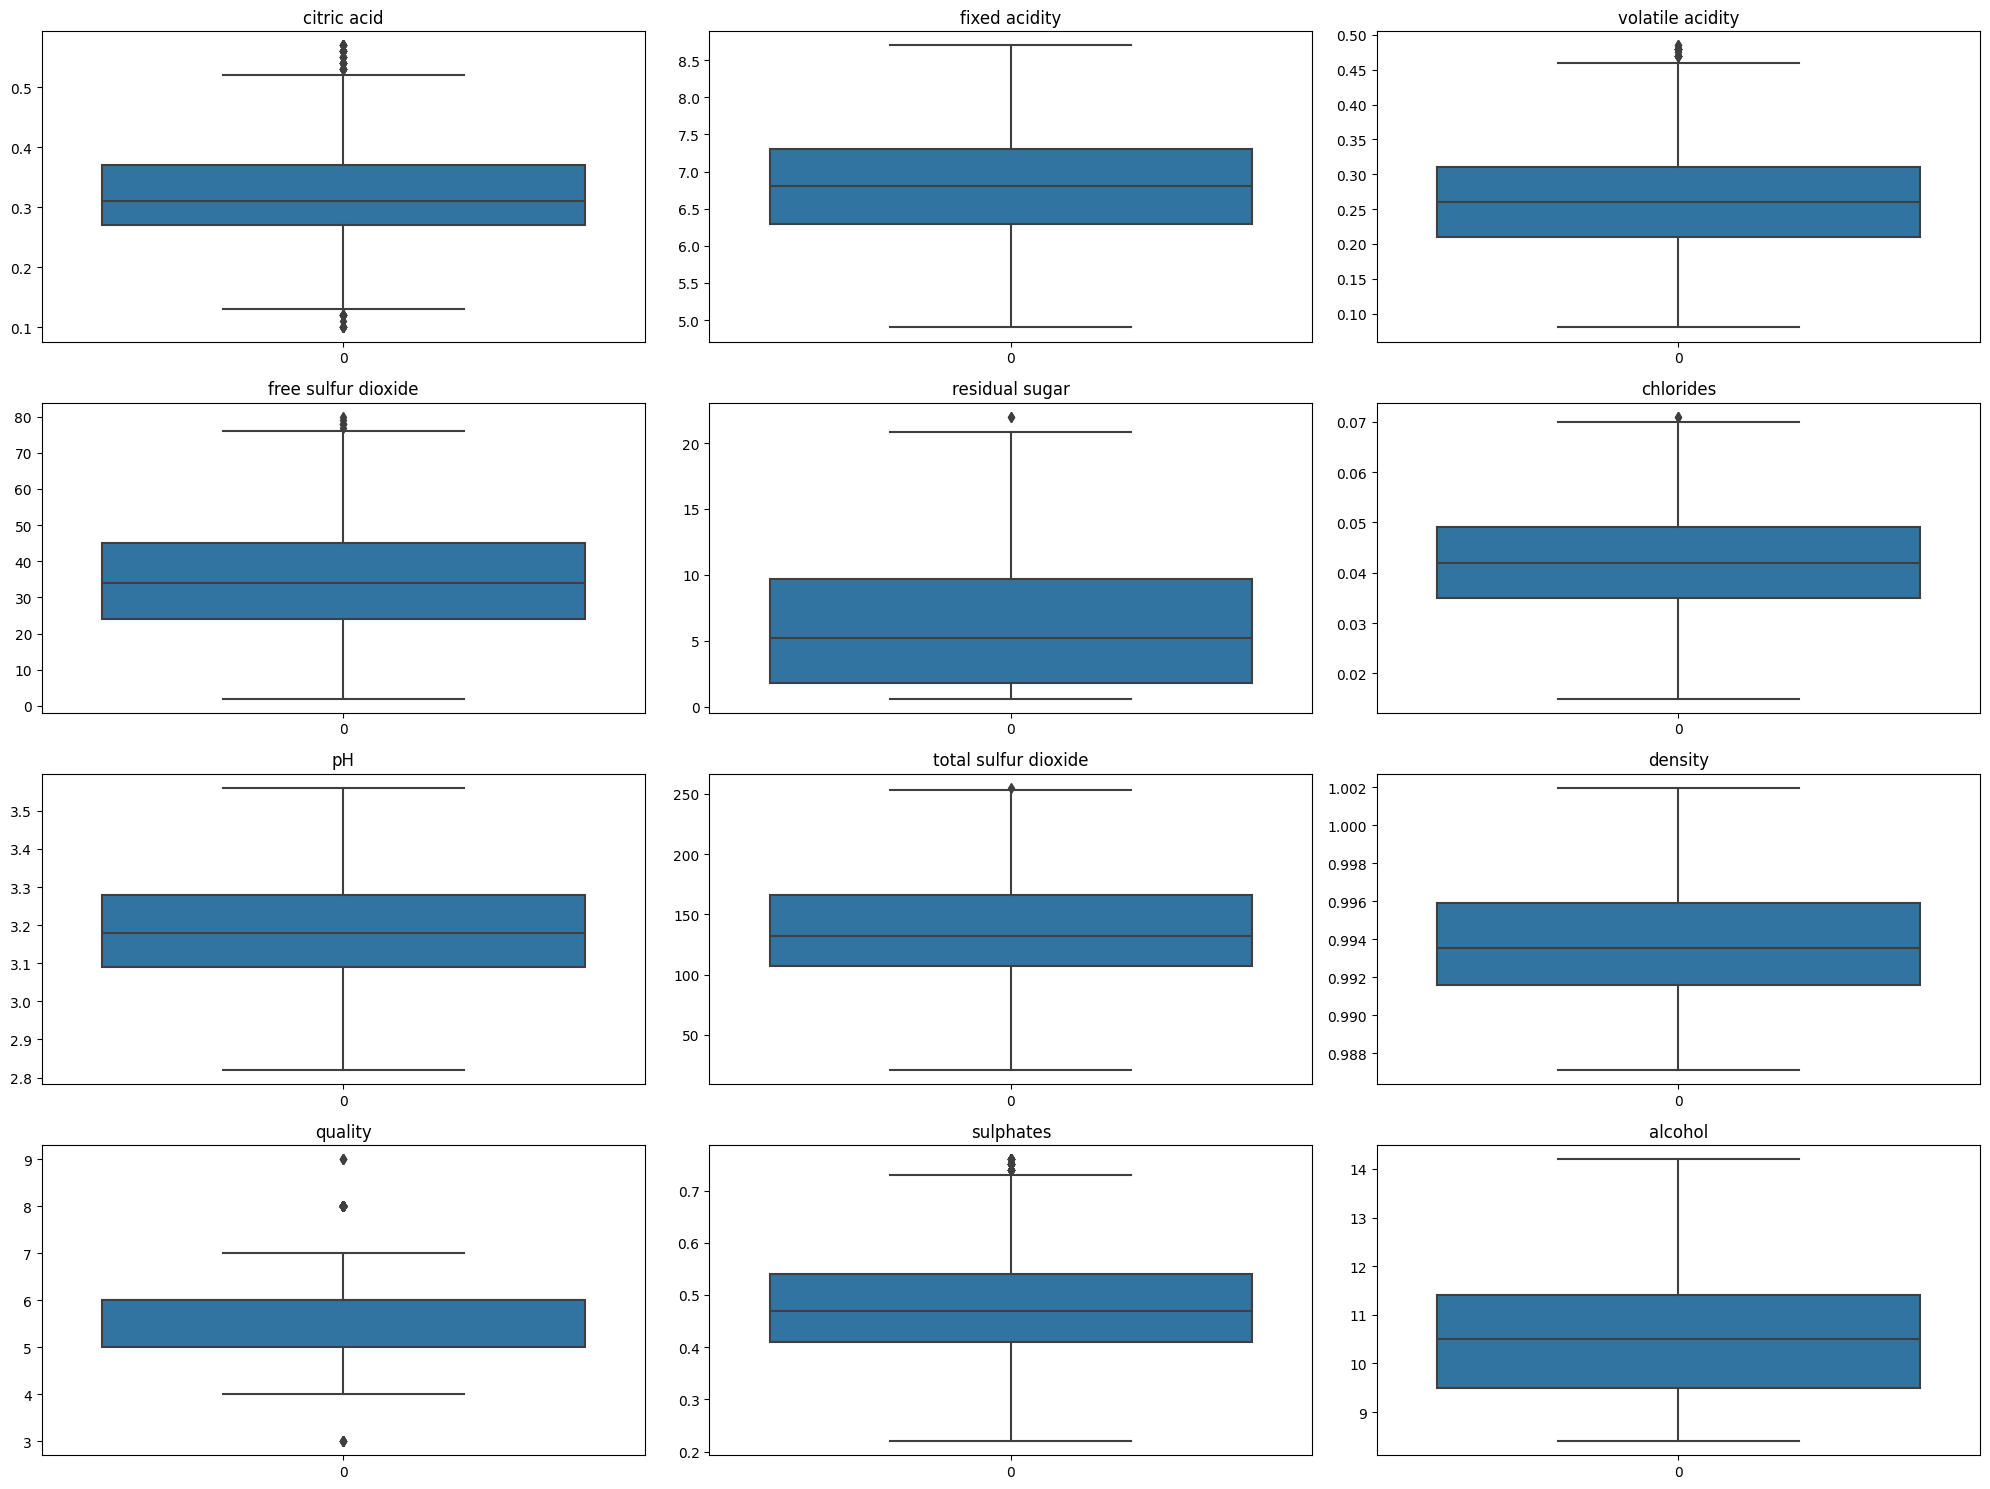

In [121]:
print(droped_df.shape)
fig, axes = plt.subplots(4,3,figsize=(20,15))
i=0
for col in droped_df.columns:
    i+=1
    sns.boxplot(droped_df[col], ax=axes[(i -1) // 3][i % 3]).set(title=col)
fig.tight_layout()

In [122]:
droped_df.to_csv('removed_outlier.csv')